In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

np.set_printoptions(precision=2, suppress=True)

# Input and kernel setup
input_matrix = np.arange(1, 26, dtype=np.float32).reshape(1, 5, 5, 1)
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]], dtype=np.float32).reshape(3, 3, 1, 1)

# Create a reusable model builder
def build_model(stride, padding):
    model = Sequential([
        Conv2D(1, kernel_size=(3, 3), strides=stride, padding=padding, 
               use_bias=False, input_shape=(5, 5, 1))
    ])
    model.trainable = False
    return model

# Reuse prediction to reduce retracing
def perform_convolution(stride, padding):
    model = build_model(stride, padding)
    model.layers[0].set_weights([kernel])
    output = model(input_matrix, training=False)  # Faster than .predict()
    print(f"Stride = {stride}, Padding = '{padding}':\n{output.numpy().squeeze()}\n")

# Run tests
for stride, pad in [(1, 'valid'), (1, 'same'), (2, 'valid'), (2, 'same')]:
    perform_convolution(stride, pad)


Stride = 1, Padding = 'valid':
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Stride = 1, Padding = 'same':
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Stride = 2, Padding = 'valid':
[[0. 0.]
 [0. 0.]]

Stride = 2, Padding = 'same':
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]



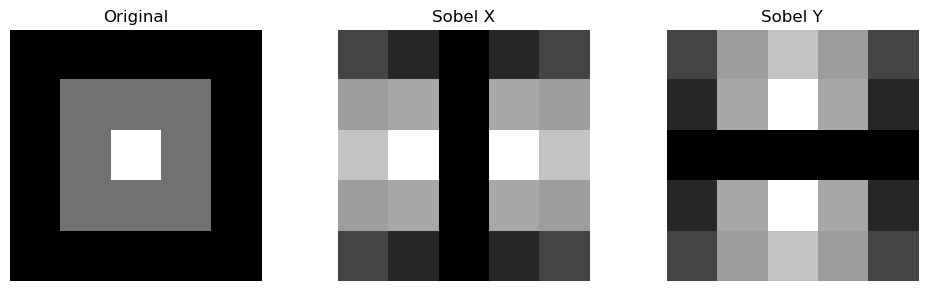

Original 4x4 Matrix:
 [[0.66 0.25 0.85 0.19]
 [0.34 0.59 0.16 0.84]
 [0.33 0.37 0.99 0.08]
 [0.58 0.63 0.93 0.48]]

Max Pooled (2x2):
 [[0.66 0.85]
 [0.63 0.99]]

Average Pooled (2x2):
 [[0.46 0.51]
 [0.48 0.62]]


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ----------- Task 1: Sobel Filters using TensorFlow -----------

# Sample 5x5 grayscale image (replace with your own data if needed)
image = np.array([
    [10, 10, 10, 10, 10],
    [10, 50, 50, 50, 10],
    [10, 50, 100, 50, 10],
    [10, 50, 50, 50, 10],
    [10, 10, 10, 10, 10]
], dtype=np.float32)

# Reshape to match Conv2D input: (batch, height, width, channels)
image_tensor = image.reshape(1, 5, 5, 1)

# Define Sobel kernels manually
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32).reshape(3, 3, 1, 1)

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32).reshape(3, 3, 1, 1)

# Apply convolution using Sobel X
conv_x = tf.nn.conv2d(image_tensor, sobel_x, strides=1, padding='SAME')
conv_y = tf.nn.conv2d(image_tensor, sobel_y, strides=1, padding='SAME')

# Convert to numpy and squeeze for plotting
conv_x = tf.abs(conv_x).numpy().squeeze()
conv_y = tf.abs(conv_y).numpy().squeeze()

# Plot results
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(conv_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(conv_y, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# ----------- Task 2: Max and Average Pooling -----------

# Create a random 4x4 matrix
input_matrix = np.random.rand(1, 4, 4, 1)

# Define pooling layers
max_pool = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
avg_pool = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2))

# Apply pooling
max_pooled = max_pool(input_matrix)
avg_pooled = avg_pool(input_matrix)

# Print results
print("Original 4x4 Matrix:\n", input_matrix.squeeze())
print("\nMax Pooled (2x2):\n", max_pooled.numpy().squeeze())
print("\nAverage Pooled (2x2):\n", avg_pooled.numpy().squeeze())



Original Accuracy: 1.0000
Min-Max Normalized Accuracy: 0.9667
Standardized Accuracy: 1.0000


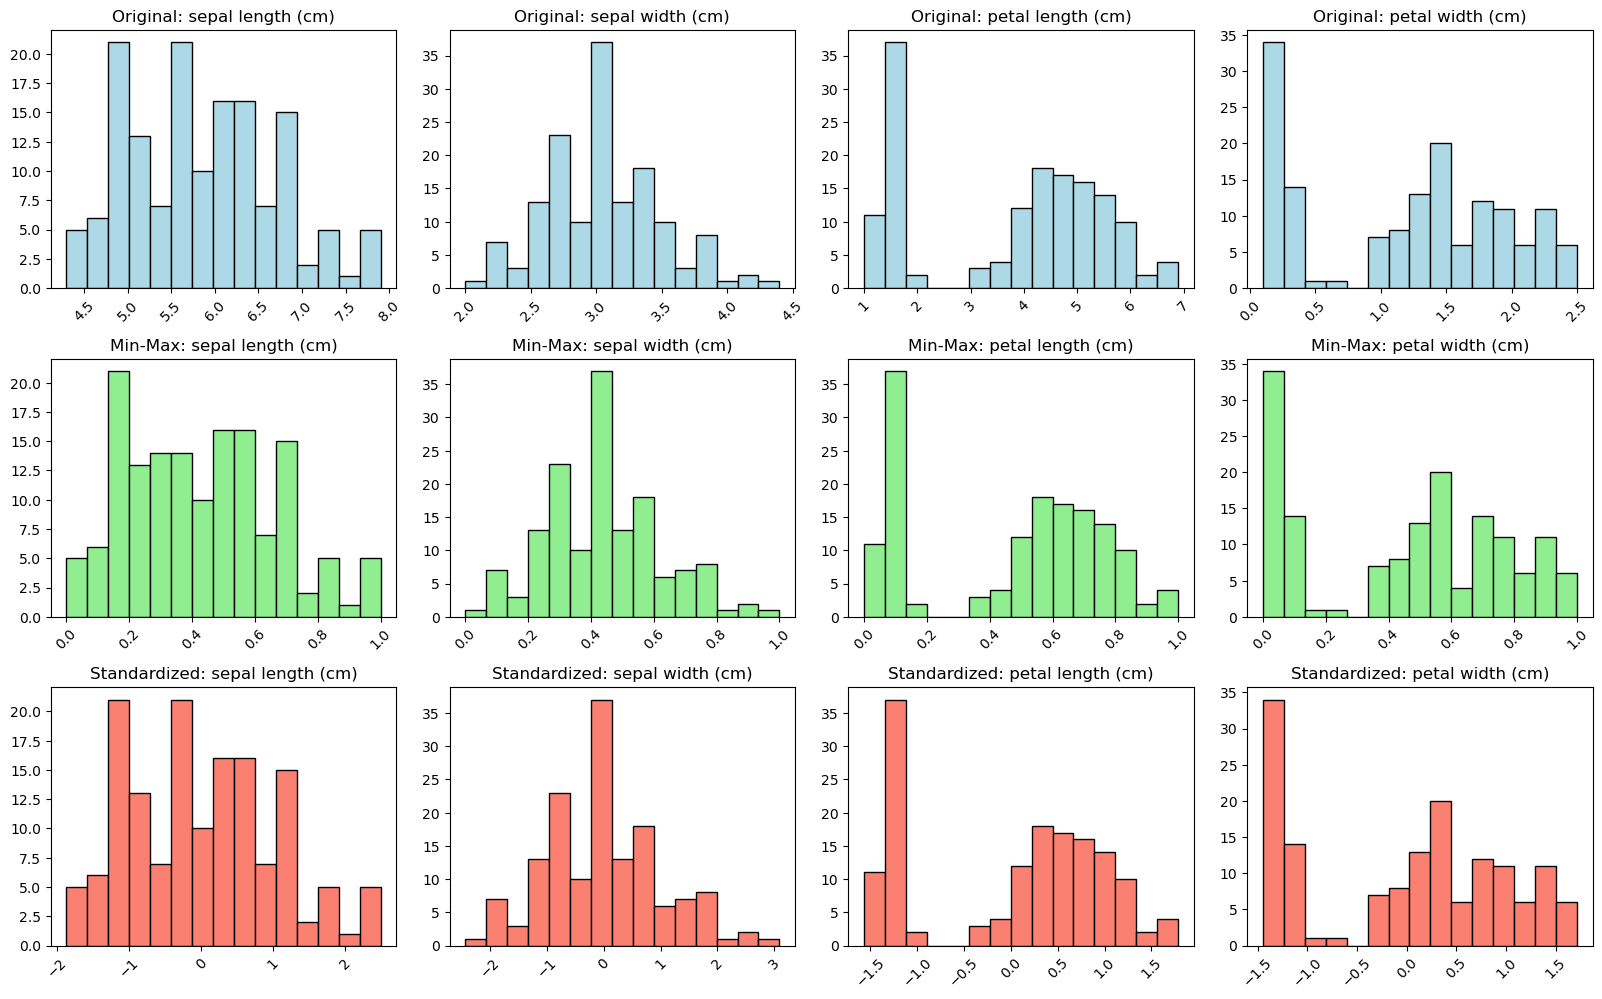


Use Normalization when you need to scale features to a fixed range (like [0, 1]),
especially for neural networks using sigmoid or tanh activation functions.

Use Standardization when data follows (approximately) a normal distribution or contains outliers,
often better for models using ReLU activation or when features have very different scales.



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Apply Min-Max Normalization (scales features to [0,1])
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Apply Z-score Standardization (zero mean, unit variance)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

# Convert to DataFrames for easier plotting
df_original = pd.DataFrame(X, columns=feature_names)
df_minmax = pd.DataFrame(X_minmax, columns=feature_names)
df_standard = pd.DataFrame(X_standard, columns=feature_names)

# Function to train logistic regression and return accuracy score
def train_and_evaluate(X_data, y_data):
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42
    )
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Evaluate all datasets
acc_original = train_and_evaluate(X, y)
acc_minmax = train_and_evaluate(X_minmax, y)
acc_standard = train_and_evaluate(X_standard, y)

# Print accuracies
print(f"Original Accuracy: {acc_original:.4f}")
print(f"Min-Max Normalized Accuracy: {acc_minmax:.4f}")
print(f"Standardized Accuracy: {acc_standard:.4f}")

# Plot histograms for all features and preprocessing methods
fig, axes = plt.subplots(3, 4, figsize=(16, 10))

for i, feature in enumerate(feature_names):
    axes[0, i].hist(df_original[feature], bins=15, color='lightblue', edgecolor='black')
    axes[0, i].set_title(f'Original: {feature}')
    axes[0, i].tick_params(axis='x', rotation=45)

    axes[1, i].hist(df_minmax[feature], bins=15, color='lightgreen', edgecolor='black')
    axes[1, i].set_title(f'Min-Max: {feature}')
    axes[1, i].tick_params(axis='x', rotation=45)

    axes[2, i].hist(df_standard[feature], bins=15, color='salmon', edgecolor='black')
    axes[2, i].set_title(f'Standardized: {feature}')
    axes[2, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Explanation of usage scenarios
print("""
Use Normalization when you need to scale features to a fixed range (like [0, 1]),
especially for neural networks using sigmoid or tanh activation functions.

Use Standardization when data follows (approximately) a normal distribution or contains outliers,
often better for models using ReLU activation or when features have very different scales.
""")
